In [2]:
import pandas as pd
import numpy as np

# Load the Titanic dataset
df = pd.read_csv(r"C:\Users\vivek\Downloads\titanic\train.csv")

# Check the size of the data
print("Shape:", df.shape)

# Look at the first few rows
df.head()

# Get info about columns and data types
df.info()

# Get some quick statistics for numerical columns
df.describe()

# Check how many missing values each column has
df.isnull().sum()


Shape: (891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [3]:
# Fill missing Age values with the median (middle value)
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill missing Embarked values with the most common value (mode)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop Cabin column because it has too many missing values
df.drop(columns=['Cabin'], inplace=True)

# Check again to make sure missing values are gone
df.isnull().sum()


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [4]:

# Convert "Sex" and "Embarked" into numeric columns using one-hot encoding
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

# Check the new dataframe
df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,False,False,True
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,True,False,True


In [5]:

# X = input features (drop columns we don’t need)
X = df.drop(columns=['Survived', 'Name', 'Ticket', 'PassengerId'])

# y = target variable (what we want to predict)
y = df['Survived']

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,       # 20% data for testing, 80% for training
    random_state=42,     # keep results consistent every run
    stratify=y           # keep survival ratio same in both train and test
)


In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Create the model
model = LogisticRegression(max_iter=200)

# Train (fit) the model with training data
model.fit(X_train, y_train)

# Predict survival for the test data
y_pred = model.predict(X_test)

# Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8044692737430168

Confusion Matrix:
[[98 12]
 [23 46]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       110
           1       0.79      0.67      0.72        69

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score

# Create dictionary of models
models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}

results = []

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred)
    })

# Show results
results_df = pd.DataFrame(results)
print(results_df)

                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.804469   0.793103  0.666667  0.724409
1        Decision Tree  0.821229   0.793651  0.724638  0.757576
2        Random Forest  0.815642   0.781250  0.724638  0.751880


In [9]:
from sklearn.model_selection import GridSearchCV

# Decision Tree parameters to try
dt_params = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Grid search for best decision tree
dt_grid = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    dt_params,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)
dt_grid.fit(X_train, y_train)
print("Best Decision Tree Params:", dt_grid.best_params_)
print("Best Decision Tree Score:", dt_grid.best_score_)

best_dt = dt_grid.best_estimator_

# Random Forest parameters to try
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Grid search for best random forest
rf_grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    rf_params,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)
rf_grid.fit(X_train, y_train)
print("\nBest Random Forest Params:", rf_grid.best_params_)
print("Best Random Forest Score:", rf_grid.best_score_)

best_rf = rf_grid.best_estimator_

# Test tuned models against test data
models = {
    "Logistic Regression": model,
    "Tuned Decision Tree": best_dt,
    "Tuned Random Forest": best_rf
}

results = []
for name, m in models.items():
    y_pred = m.predict(X_test)
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred)
    })

results_df = pd.DataFrame(results)
print("\nFinal Model Comparison:\n", results_df)


Best Decision Tree Params: {'criterion': 'gini', 'max_depth': 7, 'min_samples_split': 10}
Best Decision Tree Score: 0.8217374175120653

Best Random Forest Params: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 10, 'n_estimators': 50}
Best Random Forest Score: 0.8287402738106963

Final Model Comparison:
                  Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.815642   0.781250  0.724638  0.751880
1  Tuned Decision Tree  0.798883   0.823529  0.608696  0.700000
2  Tuned Random Forest  0.810056   0.796610  0.681159  0.734375


In [10]:
# Pick decision tree model (best one if available)
tree_model = best_dt if 'best_dt' in globals() else dt

# Train it again to match columns
tree_model.fit(X_train, y_train)

# Get feature importances
tree_importances = tree_model.feature_importances_
tree_cols = X_train.columns

# Build table
tree_df = pd.DataFrame({
    "feature": tree_cols,
    "importance": tree_importances
})
total = tree_df["importance"].sum()
tree_df["importance_pct"] = (100 * tree_df["importance"] / total) if total > 0 else 0.0
tree_df = tree_df.sort_values("importance", ascending=False).reset_index(drop=True)
tree_df.insert(0, "rank", tree_df.index + 1)

print("Decision Tree — Top Features")
tree_df.head(15)

Decision Tree — Top Features


,rank,feature,importance,importance_pct
0,1,Sex_male,0.473552,47.355178
1,2,Fare,0.187382,18.738198
2,3,Pclass,0.160991,16.099055
3,4,Age,0.135063,13.506332
4,5,Embarked_S,0.030566,3.056605
5,6,SibSp,0.011781,1.178135
6,7,Parch,0.000665,0.066497
7,8,Embarked_Q,0.000000,0.000000


In [11]:
# Pick random forest model (best one if available)
forest_model = best_rf if 'best_rf' in globals() else rf
forest_model.fit(X_train, y_train)

forest_importances = forest_model.feature_importances_
forest_cols = X_train.columns

forest_df = pd.DataFrame({
    "feature": forest_cols,
    "importance": forest_importances
})
total = forest_df["importance"].sum()
forest_df["importance_pct"] = (100 * forest_df["importance"] / total) if total > 0 else 0.0
forest_df = forest_df.sort_values("importance", ascending=False).reset_index(drop=True)
forest_df.insert(0, "rank", forest_df.index + 1)

print("Random Forest — Top Features")
forest_df.head(15)


Random Forest — Top Features


,rank,feature,importance,importance_pct
0,1,Sex_male,0.354950,35.494950
1,2,Fare,0.220536,22.053586
2,3,Age,0.180378,18.037823
3,4,Pclass,0.114174,11.417447
4,5,SibSp,0.049586,4.958638
5,6,Parch,0.040992,4.099166
6,7,Embarked_S,0.030533,3.053275
7,8,Embarked_Q,0.008851,0.885115


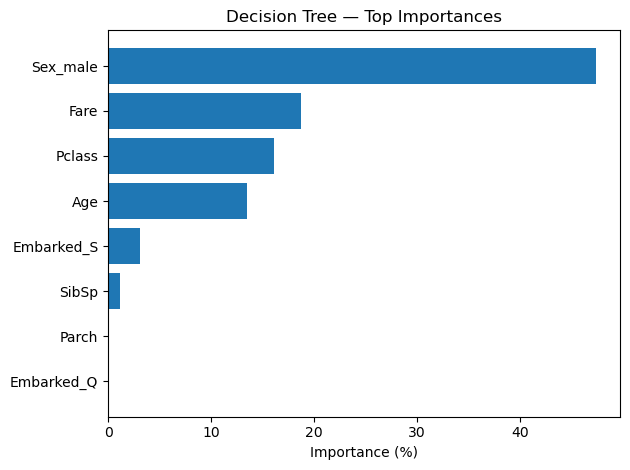

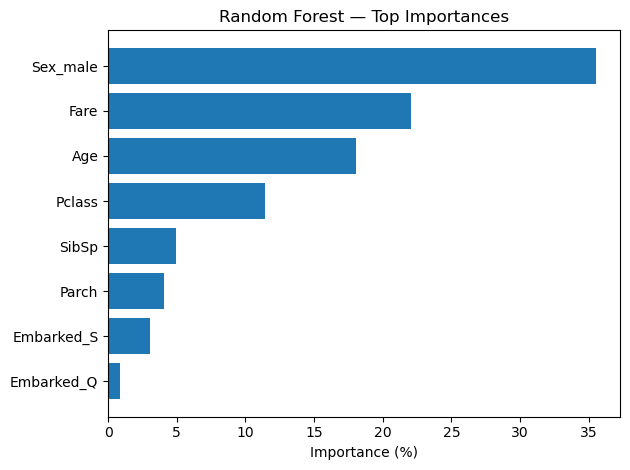

In [12]:
import matplotlib.pyplot as plt

def plot_top_importances(df, title, top_k=15):
    top = df.head(top_k)
    plt.figure()
    plt.barh(top["feature"], top["importance_pct"])
    plt.gca().invert_yaxis()
    plt.title(title)
    plt.xlabel("Importance (%)")
    plt.tight_layout()
    plt.show()

plot_top_importances(tree_df, "Decision Tree — Top Importances")
plot_top_importances(forest_df, "Random Forest — Top Importances")